<a href="https://colab.research.google.com/github/rjromo/rubenjromo.com/blob/master/ProyectoExperimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import folium
%matplotlib inline

In [2]:
path='/content/base.xlsx'
df = pd.read_excel(path)
del df['Individuo']
df.head()

,Promedio,Sexo,Tiempo
0,7.10,Masculino,40
1,6.96,Masculino,120
2,8.42,Femenino,40
3,7.78,Masculino,105
4,8.05,Femenino,30


In [0]:
df['Tiempo']=(df['Tiempo']-df['Tiempo'].mean())/df['Tiempo'].std()

In [3]:
df.head()

,Promedio,Sexo,Tiempo
0,7.10,Masculino,40
1,6.96,Masculino,120
2,8.42,Femenino,40
3,7.78,Masculino,105
4,8.05,Femenino,30


In [4]:
df.corr()

,Promedio,Tiempo
Promedio,1.000000,-0.120885
Tiempo,-0.120885,1.000000


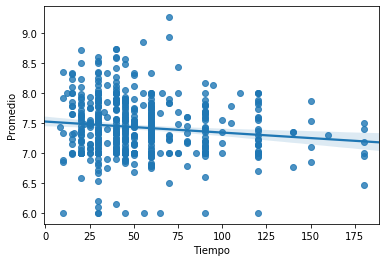

In [5]:
sns.regplot(x="Tiempo", y="Promedio", data=df)


In [6]:
pearson_coef, p_value = stats.pearsonr(df['Promedio'], df['Tiempo'])
print("El coeficiente de correlación Pearson es", pearson_coef, " con un valor P de P =", p_value)

El coeficiente de correlación Pearson es -0.12088489631992358  con un valor P de P = 0.006270381236676086


Text(0.5, 1.0, 'Frecuencia de Promedios')

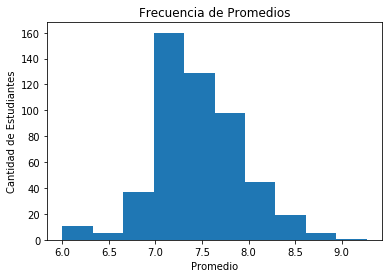

In [7]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Promedio"])

plt.pyplot.xlabel("Promedio")
plt.pyplot.ylabel("Cantidad de Estudiantes")
plt.pyplot.title("Frecuencia de Promedios")

Text(0.5, 1.0, 'Frecuencia de Tiempo de Estudio')

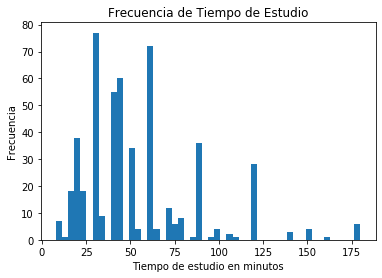

In [8]:
plt.pyplot.hist(df["Tiempo"], bins = 50)

# set x/y labels and plot title
plt.pyplot.xlabel("Tiempo de estudio en minutos")
plt.pyplot.ylabel("Frecuencia")
plt.pyplot.title("Frecuencia de Tiempo de Estudio")

In [9]:
bins = np.linspace(min(df["Tiempo"]), max(df["Tiempo"]), 4)

group_names = ['0h-1h', '1h-2h', '+2h']

df['Tiempo-binned'] = pd.cut(df['Tiempo'], bins, labels=group_names, include_lowest=True )
df[['Tiempo','Tiempo-binned']].head()

,Tiempo,Tiempo-binned
0,40,0h-1h
1,120,1h-2h
2,40,0h-1h
3,105,1h-2h
4,30,0h-1h


In [10]:
df['Tiempo-binned'].value_counts()
bins

array([  8.        ,  65.33333333, 122.66666667, 180.        ])

Text(0.5, 1.0, 'Frecuencia de Estudio')

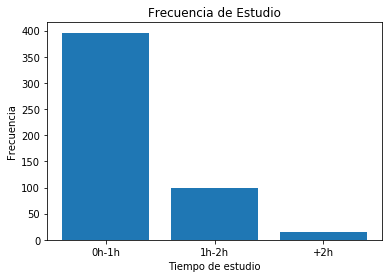

In [11]:
pyplot.bar(group_names, df["Tiempo-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Tiempo de estudio")
plt.pyplot.ylabel("Frecuencia")
plt.pyplot.title("Frecuencia de Estudio")

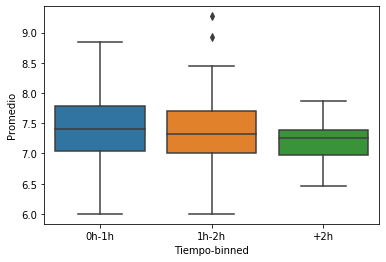

In [12]:
sns.boxplot(x="Tiempo-binned", y="Promedio", data=df)

In [13]:
categoria_sexo = pd.get_dummies(df["Sexo"])

categoria_sexo

,Femenino,Masculino
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
505,0,1
506,0,1
507,1,0
508,0,1


In [14]:
df = pd.concat([df, categoria_sexo], axis=1)
df

,Promedio,Sexo,Tiempo,Tiempo-binned,Femenino,Masculino
0,7.10,Masculino,40,0h-1h,0,1
1,6.96,Masculino,120,1h-2h,0,1
2,8.42,Femenino,40,0h-1h,1,0
3,7.78,Masculino,105,1h-2h,0,1
4,8.05,Femenino,30,0h-1h,1,0
...,...,...,...,...,...,...
505,7.37,Masculino,20,0h-1h,0,1
506,7.14,Masculino,45,0h-1h,0,1
507,7.82,Femenino,90,1h-2h,1,0
508,7.27,Masculino,90,1h-2h,0,1


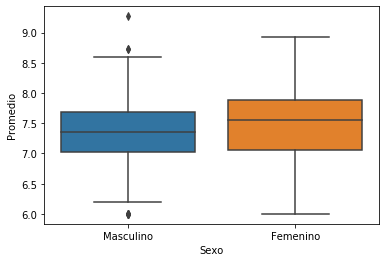

In [15]:
sns.boxplot(x="Sexo", y="Promedio", data=df)

In [16]:
df_group_one = df[['Sexo','Promedio','Tiempo-binned']]
df_group_one.head(10)

,Sexo,Promedio,Tiempo-binned
0,Masculino,7.10,0h-1h
1,Masculino,6.96,1h-2h
2,Femenino,8.42,0h-1h
3,Masculino,7.78,1h-2h
4,Femenino,8.05,0h-1h
5,Masculino,7.44,1h-2h
6,Masculino,6.87,0h-1h
7,Femenino,6.90,0h-1h
8,Femenino,7.94,0h-1h
9,Masculino,8.73,0h-1h


In [17]:
df_group_one = df_group_one.groupby(['Sexo'],as_index=False).mean()
df_group_one

,Sexo,Promedio
0,Femenino,7.512768
1,Masculino,7.384595


In [18]:
df_gptest = df[['Sexo','Promedio','Tiempo-binned']]
grouped_test1 = df_gptest.groupby(['Sexo','Tiempo-binned'],as_index=False).mean()
grouped_test1.head()

,Sexo,Tiempo-binned,Promedio
0,Femenino,0h-1h,7.548140
1,Femenino,1h-2h,7.427955
2,Femenino,+2h,7.305000
3,Masculino,0h-1h,7.396891
4,Masculino,1h-2h,7.368571


In [19]:
grouped_pivot = grouped_test1.pivot(index='Tiempo-binned',columns='Sexo')
grouped_pivot

Promedio          
Sexo           Femenino Masculino
Tiempo-binned                    
0h-1h          7.548140  7.396891
1h-2h          7.427955  7.368571
+2h            7.305000  7.146000

In [20]:
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

Promedio          
Sexo           Femenino Masculino
Tiempo-binned                    
0h-1h          7.548140  7.396891
1h-2h          7.427955  7.368571
+2h            7.305000  7.146000

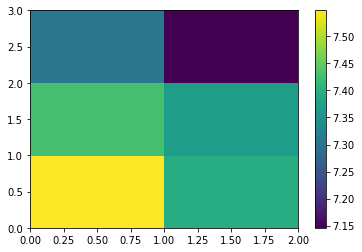

In [21]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.pcolor(grouped_pivot)
plt.colorbar()
plt.show()

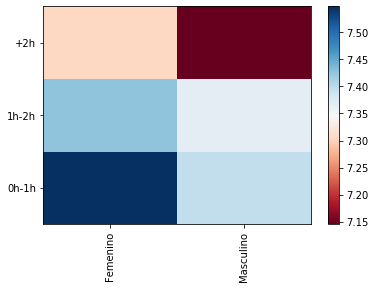

In [22]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')


row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index


ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)


ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [45]:
grouped_test2=df_gptest[['Promedio', 'Tiempo-binned']].groupby(['Tiempo-binned'])
grouped_test2.head(2)

,Promedio,Tiempo-binned
0,7.10,0h-1h
1,6.96,1h-2h
2,8.42,0h-1h
3,7.78,1h-2h
17,6.47,+2h
27,7.87,+2h


In [46]:
df_gptest.head()

,Sexo,Promedio,Tiempo-binned
0,Masculino,7.10,0h-1h
1,Masculino,6.96,1h-2h
2,Femenino,8.42,0h-1h
3,Masculino,7.78,1h-2h
4,Femenino,8.05,0h-1h


In [47]:
f_val, p_val = stats.f_oneway(grouped_test2.get_group('0h-1h')['Promedio'], grouped_test2.get_group('1h-2h')['Promedio'], grouped_test2.get_group('+2h')['Promedio'])  
 
print( "Resultados ANOVA: F=", f_val, ", P =", p_val)

Resultados ANOVA: F= 2.132788644056413 , P = 0.11956840024759231


In [48]:
grouped_test3=df_gptest[['Promedio', 'Sexo']].groupby(['Sexo'])
grouped_test3.head(2)

,Promedio,Sexo
0,7.10,Masculino
1,6.96,Masculino
2,8.42,Femenino
4,8.05,Femenino


In [49]:
f_val, p_val = stats.f_oneway(grouped_test3.get_group('Masculino')['Promedio'], grouped_test3.get_group('Femenino')['Promedio'])  
 
print( "Resultados ANOVA: F=", f_val, ", P =", p_val)

Resultados ANOVA: F= 7.978522939665553 , P = 0.0049196548595049384


In [50]:
grouped_test4=df_gptest[['Tiempo-binned', 'Sexo']].groupby(['Sexo'])
grouped_test4.head(2)

,Tiempo-binned,Sexo
0,0h-1h,Masculino
1,1h-2h,Masculino
2,0h-1h,Femenino
4,0h-1h,Femenino


In [51]:
f_val, p_val = stats.f_oneway(grouped_test4.get_group('0h-1h')['Sexo'], grouped_test4.get_group('1h-2h')['Sexo'],grouped_test4.get_group('+3h')['Sexo'])  
 
print( "Resultados ANOVA: F=", f_val, ", P =", p_val)

KeyError: ignored